In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../datasets/pizza_delivery.csv")

In [4]:
df.head(50)

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0
5,Thursday,01-May-14,40.254321,Melissa,Centre,Bruno,60.759504,61.8,4,1,1,0
6,Thursday,01-May-14,48.728610,Laura,West,Bruno,58.258697,57.9,3,1,1,0
7,Thursday,01-May-14,34.027722,Melissa,West,Mario,68.127927,35.8,2,0,0,0
8,Thursday,01-May-14,28.209429,Laura,Centre,Mario,64.946607,36.6,2,0,0,0
9,Thursday,01-May-14,37.954792,Melissa,Centre,Bruno,60.007379,44.8,5,0,0,0


**Testing null values**

In [5]:
df.isna().sum()

day                  0
date                 0
time                 0
operator             0
branch               0
driver               0
temperature          0
bill                 0
pizzas               0
free_wine            0
got_wine             0
discount_customer    0
dtype: int64

In [6]:
## total unique drivers
df.driver.unique()

array(['Bruno', 'Salvatore', 'Mario', 'Luigi', 'Domenico'], dtype=object)

In [5]:
drivers_df =  df.groupby("driver")

In [6]:
driver_revenue =  drivers_df.apply(lambda group: group.bill.sum())
driver_revenue.rename_axis("Driver Revenue")

Driver Revenue
Bruno        14684.7
Domenico      3095.8
Luigi         5831.0
Mario        15364.6
Salvatore    15152.9
dtype: float64

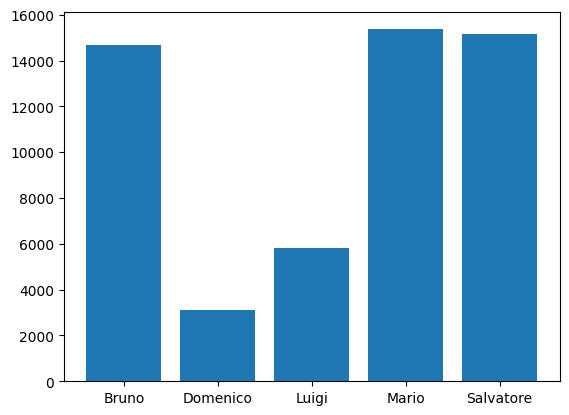

In [7]:
fig , axes = plt.subplots()

axes.bar(driver_revenue.index, driver_revenue)
plt.show()

In [8]:
driver_per_branch =  drivers_df.apply(lambda group: group.groupby("branch")["bill"].sum())
driver_per_branch

branch,Centre,East,West
driver,,,
Bruno,6346.9,3083.4,5254.4
Domenico,589.1,1766.3,740.4
Luigi,1980.6,2204.9,1645.5
Mario,5157.0,4805.0,5402.6
Salvatore,5757.8,3204.6,6190.5


**Overlapping condition**

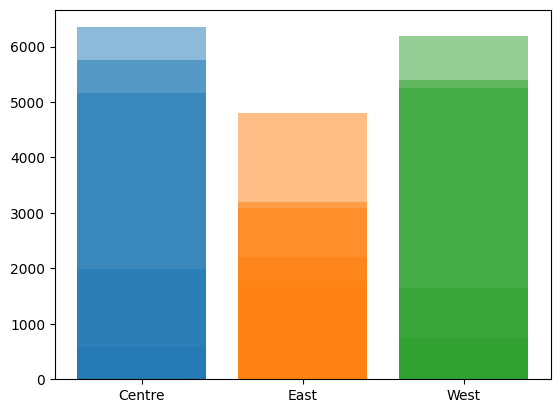

In [24]:
fig , axes = plt.subplots()

for  driver, values in driver_per_branch.items():
    axes.bar(driver, values, alpha=0.5)

plt.show()

In [10]:
driver_per_branch.index, len(driver_per_branch.index)

(Index(['Bruno', 'Domenico', 'Luigi', 'Mario', 'Salvatore'], dtype='object', name='driver'),
 5)

**Avoiding the Overlapping Problem**

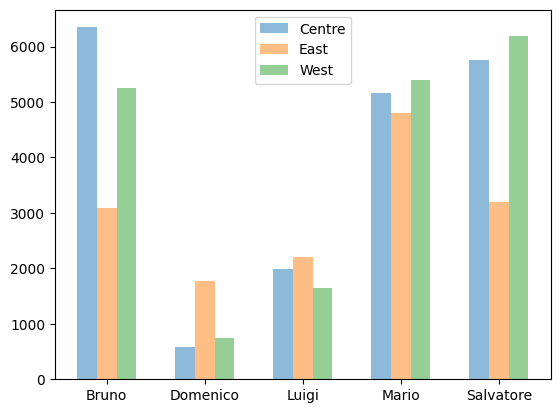

In [36]:
fig , axes = plt.subplots()

# 1. create dummy labels in number
labels = np.arange(len(driver_per_branch.index)) 

wid = 0.2
offset = 0

for  driver, values in driver_per_branch.items():
    axes.bar(labels+offset, values, alpha=0.5, width=wid, label=driver)
    offset += wid


mid_points = labels+(len(driver_per_branch.columns)*wid)/2

axes.set_xticks(mid_points-(wid/2), driver_per_branch.index)

axes.legend()
plt.show()

In [26]:
labels = np.arange(len(driver_per_branch.index))
labels 

array([0, 1, 2, 3, 4])

In [12]:
for driver, values in driver_per_branch.items():
    print(driver,values)
    print("\n============================\n")

Centre driver
Bruno        6346.9
Domenico      589.1
Luigi        1980.6
Mario        5157.0
Salvatore    5757.8
Name: Centre, dtype: float64


East driver
Bruno        3083.4
Domenico     1766.3
Luigi        2204.9
Mario        4805.0
Salvatore    3204.6
Name: East, dtype: float64


West driver
Bruno        5254.4
Domenico      740.4
Luigi        1645.5
Mario        5402.6
Salvatore    6190.5
Name: West, dtype: float64


